In [1]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
from datetime import datetime
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Data Preprocessing

## Count Images

In [2]:
# Count Fresh fruit images
source_path = '2_combined_dataset_2000'

source_path_fresh_apple = os.path.join(source_path, 'Fresh_Apple/')
source_path_fresh_banana = os.path.join(source_path, 'Fresh_Banana/')
source_path_fresh_guava = os.path.join(source_path, 'Fresh_Guava/')
source_path_fresh_mango = os.path.join(source_path, 'Fresh_Mango/')
source_path_fresh_orange = os.path.join(source_path, 'Fresh_Orange/')
source_path_fresh_strawberry = os.path.join(source_path, 'Fresh_Strawberry/')

print(f"There are {len(os.listdir(source_path_fresh_apple))} images of fresh apple.")
print(f"There are {len(os.listdir(source_path_fresh_banana))} images of fresh banana.")
print(f"There are {len(os.listdir(source_path_fresh_guava))} images of fresh guava.")
print(f"There are {len(os.listdir(source_path_fresh_mango))} images of fresh mango.")
print(f"There are {len(os.listdir(source_path_fresh_orange))} images of fresh orange.")
print(f"There are {len(os.listdir(source_path_fresh_strawberry))} images of fresh strawberry.")

There are 1956 images of fresh apple.
There are 1989 images of fresh banana.
There are 1602 images of fresh guava.
There are 1855 images of fresh mango.
There are 1979 images of fresh orange.
There are 1803 images of fresh strawberry.


In [3]:
# Count Rotten fruit images
source_path_rotten_apple = os.path.join(source_path, 'Rotten_Apple/')
source_path_rotten_banana = os.path.join(source_path, 'Rotten_Banana/')
source_path_rotten_guava = os.path.join(source_path, 'Rotten_Guava/')
source_path_rotten_mango = os.path.join(source_path, 'Rotten_Mango/')
source_path_rotten_orange = os.path.join(source_path, 'Rotten_Orange/')
source_path_rotten_strawberry = os.path.join(source_path, 'Rotten_Strawberry/')

print(f"There are {len(os.listdir(source_path_rotten_apple))} images of rotten apple.")
print(f"There are {len(os.listdir(source_path_rotten_banana))} images of rotten banana.")
print(f"There are {len(os.listdir(source_path_rotten_guava))} images of rotten guava.")
print(f"There are {len(os.listdir(source_path_rotten_mango))} images of rotten mango.")
print(f"There are {len(os.listdir(source_path_rotten_orange))} images of rotten orange.")
print(f"There are {len(os.listdir(source_path_rotten_strawberry))} images of rotten strawberry.")

There are 1956 images of rotten apple.
There are 1989 images of rotten banana.
There are 1579 images of rotten guava.
There are 1843 images of rotten mango.
There are 1979 images of rotten orange.
There are 1796 images of rotten strawberry.


In [4]:
# count all images in all folder
print(f"There are {len(os.listdir(source_path_fresh_apple)) + len(os.listdir(source_path_fresh_banana)) + len(os.listdir(source_path_fresh_guava)) + len(os.listdir(source_path_fresh_mango)) + len(os.listdir(source_path_fresh_orange)) + len(os.listdir(source_path_fresh_strawberry)) + len(os.listdir(source_path_rotten_apple)) + len(os.listdir(source_path_rotten_banana)) + len(os.listdir(source_path_rotten_guava)) + len(os.listdir(source_path_rotten_mango)) + len(os.listdir(source_path_rotten_orange)) + len(os.listdir(source_path_rotten_strawberry)) } images of fruit.")

There are 22326 images of fruit.


# Equalizing the number of image

In [6]:
# delete n number of images in a folder randomly
def delete_random_images(path, n):
    for i in range(n):
        random_file = random.choice(os.listdir(path))
        file_path = os.path.join(path, random_file)
        os.remove(file_path)

In [7]:
# apply the function to the fresh fruit images
# delete_random_images(source_path_fresh_apple, 2000) 
# delete_random_images(source_path_fresh_banana, 2000) 
# delete_random_images(source_path_fresh_orange, 2000) 

print(f"There are {len(os.listdir(source_path_fresh_apple))} images of fresh apple.")
print(f"There are {len(os.listdir(source_path_fresh_banana))} images of fresh banana.")
print(f"There are {len(os.listdir(source_path_fresh_orange))} images of fresh orange.")

There are 1956 images of fresh apple.
There are 1989 images of fresh banana.
There are 1979 images of fresh orange.


In [9]:
# apply the function to the rotten fruit images
# delete_random_images(source_path_rotten_apple, 2000) 
# delete_random_images(source_path_rotten_banana, 2000) 
# delete_random_images(source_path_rotten_orange, 2000) 

print(f"There are {len(os.listdir(source_path_rotten_apple))} images of rotten apple.")
print(f"There are {len(os.listdir(source_path_rotten_banana))} images of rotten banana.")
print(f"There are {len(os.listdir(source_path_rotten_orange))} images of rotten orange.")

There are 1956 images of rotten apple.
There are 1989 images of rotten banana.
There are 1979 images of rotten orange.


# Split Dataset

In [10]:
# Define root directory
root_dir = '3_fix_dataset_2000'

In [11]:
# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  # Create the training, validation, and testing directories
  os.makedirs(os.path.join(root_dir, 'training'))
  os.makedirs(os.path.join(root_dir, 'validation'))
  os.makedirs(os.path.join(root_dir, 'testing'))

  # Create the subdirectories for training class
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_apple'))
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_banana'))
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_guava'))
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_mango'))
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_orange'))
  os.makedirs(os.path.join(root_dir, 'training', 'fresh_strawberry'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_apple'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_banana'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_guava'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_mango'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_orange'))
  os.makedirs(os.path.join(root_dir, 'training', 'rotten_strawberry'))

  # Create the subdirectories for validation class
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_apple'))
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_banana'))
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_guava'))
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_mango'))
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_orange'))
  os.makedirs(os.path.join(root_dir, 'validation', 'fresh_strawberry'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_apple'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_banana'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_guava'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_mango'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_orange'))
  os.makedirs(os.path.join(root_dir, 'validation', 'rotten_strawberry'))

  # Create the subdirectories for testing class
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_apple'))
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_banana'))
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_guava'))
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_mango'))
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_orange'))
  os.makedirs(os.path.join(root_dir, 'testing', 'fresh_strawberry'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_apple'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_banana'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_guava'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_mango'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_orange'))
  os.makedirs(os.path.join(root_dir, 'testing', 'rotten_strawberry'))
  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [12]:
# Check if the directory is created
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

3_fix_dataset_2000\testing
3_fix_dataset_2000\training
3_fix_dataset_2000\validation
3_fix_dataset_2000\testing\fresh_apple
3_fix_dataset_2000\testing\fresh_banana
3_fix_dataset_2000\testing\fresh_guava
3_fix_dataset_2000\testing\fresh_mango
3_fix_dataset_2000\testing\fresh_orange
3_fix_dataset_2000\testing\fresh_strawberry
3_fix_dataset_2000\testing\rotten_apple
3_fix_dataset_2000\testing\rotten_banana
3_fix_dataset_2000\testing\rotten_guava
3_fix_dataset_2000\testing\rotten_mango
3_fix_dataset_2000\testing\rotten_orange
3_fix_dataset_2000\testing\rotten_strawberry
3_fix_dataset_2000\training\fresh_apple
3_fix_dataset_2000\training\fresh_banana
3_fix_dataset_2000\training\fresh_guava
3_fix_dataset_2000\training\fresh_mango
3_fix_dataset_2000\training\fresh_orange
3_fix_dataset_2000\training\fresh_strawberry
3_fix_dataset_2000\training\rotten_apple
3_fix_dataset_2000\training\rotten_banana
3_fix_dataset_2000\training\rotten_guava
3_fix_dataset_2000\training\rotten_mango
3_fix_dataset_2

In [13]:
# Create a function to split the data into training, validation, and testing directories
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE_DIR):
        file = SOURCE_DIR + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    random.shuffle(files)

    # Split the data with 80% training, 10% validation, and 10% testing
    training_length = int(len(files) * 0.8)
    validation_length = int(len(files) * 0.1)
    testing_length = len(files) - training_length - validation_length

    training_set = files[:training_length]
    validation_set = files[training_length:training_length + validation_length]
    testing_set = files[training_length + validation_length:]

    for filename in training_set:
        this_file = SOURCE_DIR + filename
        destination = TRAINING_DIR + filename
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = SOURCE_DIR + filename
        destination = VALIDATION_DIR + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE_DIR + filename
        destination = TEST_DIR + filename
        copyfile(this_file, destination)


In [14]:
# Define the source directories
FRESH_APPLE_SOURCE_DIR = source_path_fresh_apple
FRESH_BANANA_SOURCE_DIR = source_path_fresh_banana
FRESH_GUAVA_SOURCE_DIR = source_path_fresh_guava
FRESH_MANGO_SOURCE_DIR = source_path_fresh_mango
FRESH_ORANGE_SOURCE_DIR = source_path_fresh_orange
FRESH_STRAWBERRY_SOURCE_DIR = source_path_fresh_strawberry
ROTTEN_APPLE_SOURCE_DIR = source_path_rotten_apple
ROTTEN_BANANA_SOURCE_DIR = source_path_rotten_banana
ROTTEN_GUAVA_SOURCE_DIR = source_path_rotten_guava
ROTTEN_MANGO_SOURCE_DIR = source_path_rotten_mango
ROTTEN_ORANGE_SOURCE_DIR = source_path_rotten_orange
ROTTEN_STRAWBERRY_SOURCE_DIR = source_path_rotten_strawberry

In [15]:
# Define the training, validation, and testing directories
TRAINING_DIR = '3_fix_dataset_2000/training/'
VALIDATION_DIR = '3_fix_dataset_2000/validation/'
TESTING_DIR = '3_fix_dataset_2000/testing/'

In [16]:
# Define the subdirectories for training, validation, and testing
TRAINING_FRESH_APPLE_DIR = os.path.join(TRAINING_DIR, "fresh_apple/")
VALIDATION_FRESH_APPLE_DIR = os.path.join(VALIDATION_DIR, "fresh_apple/")
TESTING_FRESH_APPLE_DIR = os.path.join(TESTING_DIR, "fresh_apple/")

TRAINING_FRESH_BANANA_DIR = os.path.join(TRAINING_DIR, "fresh_banana/")
VALIDATION_FRESH_BANANA_DIR = os.path.join(VALIDATION_DIR, "fresh_banana/")
TESTING_FRESH_BANANA_DIR = os.path.join(TESTING_DIR, "fresh_banana/")

TRAINING_FRESH_GUAVA_DIR = os.path.join(TRAINING_DIR, "fresh_guava/")
VALIDATION_FRESH_GUAVA_DIR = os.path.join(VALIDATION_DIR, "fresh_guava/")
TESTING_FRESH_GUAVA_DIR = os.path.join(TESTING_DIR, "fresh_guava/")

TRAINING_FRESH_MANGO_DIR = os.path.join(TRAINING_DIR, "fresh_mango/")
VALIDATION_FRESH_MANGO_DIR = os.path.join(VALIDATION_DIR, "fresh_mango/")
TESTING_FRESH_MANGO_DIR = os.path.join(TESTING_DIR, "fresh_mango/")

TRAINING_FRESH_ORANGE_DIR = os.path.join(TRAINING_DIR, "fresh_orange/")
VALIDATION_FRESH_ORANGE_DIR = os.path.join(VALIDATION_DIR, "fresh_orange/")
TESTING_FRESH_ORANGE_DIR = os.path.join(TESTING_DIR, "fresh_orange/")

TRAINING_FRESH_STRAWBERRY_DIR = os.path.join(TRAINING_DIR, "fresh_strawberry/")
VALIDATION_FRESH_STRAWBERRY_DIR = os.path.join(VALIDATION_DIR, "fresh_strawberry/")
TESTING_FRESH_STRAWBERRY_DIR = os.path.join(TESTING_DIR, "fresh_strawberry/")

TRAINING_ROTTEN_APPLE_DIR = os.path.join(TRAINING_DIR, "rotten_apple/")
VALIDATION_ROTTEN_APPLE_DIR = os.path.join(VALIDATION_DIR, "rotten_apple/")
TESTING_ROTTEN_APPLE_DIR = os.path.join(TESTING_DIR, "rotten_apple/")

TRAINING_ROTTEN_BANANA_DIR = os.path.join(TRAINING_DIR, "rotten_banana/")
VALIDATION_ROTTEN_BANANA_DIR = os.path.join(VALIDATION_DIR, "rotten_banana/")
TESTING_ROTTEN_BANANA_DIR = os.path.join(TESTING_DIR, "rotten_banana/")

TRAINING_ROTTEN_GUAVA_DIR = os.path.join(TRAINING_DIR, "rotten_guava/")
VALIDATION_ROTTEN_GUAVA_DIR = os.path.join(VALIDATION_DIR, "rotten_guava/")
TESTING_ROTTEN_GUAVA_DIR = os.path.join(TESTING_DIR, "rotten_guava/")

TRAINING_ROTTEN_MANGO_DIR = os.path.join(TRAINING_DIR, "rotten_mango/")
VALIDATION_ROTTEN_MANGO_DIR = os.path.join(VALIDATION_DIR, "rotten_mango/")
TESTING_ROTTEN_MANGO_DIR = os.path.join(TESTING_DIR, "rotten_mango/")

TRAINING_ROTTEN_ORANGE_DIR = os.path.join(TRAINING_DIR, "rotten_orange/")
VALIDATION_ROTTEN_ORANGE_DIR = os.path.join(VALIDATION_DIR, "rotten_orange/")
TESTING_ROTTEN_ORANGE_DIR = os.path.join(TESTING_DIR, "rotten_orange/")

TRAINING_ROTTEN_STRAWBERRY_DIR = os.path.join(TRAINING_DIR, "rotten_strawberry/")
VALIDATION_ROTTEN_STRAWBERRY_DIR = os.path.join(VALIDATION_DIR, "rotten_strawberry/")
TESTING_ROTTEN_STRAWBERRY_DIR = os.path.join(TESTING_DIR, "rotten_strawberry/")

In [17]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_FRESH_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FRESH_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FRESH_GUAVA_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FRESH_MANGO_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FRESH_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FRESH_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TRAINING_FRESH_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_GUAVA_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_MANGO_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROTTEN_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TRAINING_ROTTEN_STRAWBERRY_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_FRESH_APPLE_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FRESH_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FRESH_GUAVA_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FRESH_MANGO_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FRESH_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FRESH_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(VALIDATION_FRESH_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_APPLE_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_GUAVA_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_MANGO_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROTTEN_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROTTEN_STRAWBERRY_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_FRESH_APPLE_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FRESH_BANANA_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FRESH_GUAVA_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FRESH_MANGO_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FRESH_ORANGE_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FRESH_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TESTING_FRESH_STRAWBERRY_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_APPLE_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_BANANA_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_GUAVA_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_GUAVA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_MANGO_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_MANGO_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_ORANGE_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROTTEN_STRAWBERRY_DIR)) > 0:
  for file in os.scandir(TESTING_ROTTEN_STRAWBERRY_DIR):
    os.remove(file.path)

In [18]:
# Define proportion of images used for training
split_size = .8

In [19]:
# Run the split function
split_data(FRESH_APPLE_SOURCE_DIR, TRAINING_FRESH_APPLE_DIR, VALIDATION_FRESH_APPLE_DIR, TESTING_FRESH_APPLE_DIR, split_size)
split_data(FRESH_BANANA_SOURCE_DIR, TRAINING_FRESH_BANANA_DIR, VALIDATION_FRESH_BANANA_DIR, TESTING_FRESH_BANANA_DIR, split_size)
split_data(FRESH_GUAVA_SOURCE_DIR, TRAINING_FRESH_GUAVA_DIR, VALIDATION_FRESH_GUAVA_DIR, TESTING_FRESH_GUAVA_DIR, split_size)
split_data(FRESH_MANGO_SOURCE_DIR, TRAINING_FRESH_MANGO_DIR, VALIDATION_FRESH_MANGO_DIR, TESTING_FRESH_MANGO_DIR, split_size)
split_data(FRESH_ORANGE_SOURCE_DIR, TRAINING_FRESH_ORANGE_DIR, VALIDATION_FRESH_ORANGE_DIR, TESTING_FRESH_ORANGE_DIR, split_size)
split_data(FRESH_STRAWBERRY_SOURCE_DIR, TRAINING_FRESH_STRAWBERRY_DIR, VALIDATION_FRESH_STRAWBERRY_DIR, TESTING_FRESH_STRAWBERRY_DIR, split_size)
split_data(ROTTEN_APPLE_SOURCE_DIR, TRAINING_ROTTEN_APPLE_DIR, VALIDATION_ROTTEN_APPLE_DIR, TESTING_ROTTEN_APPLE_DIR, split_size)
split_data(ROTTEN_BANANA_SOURCE_DIR, TRAINING_ROTTEN_BANANA_DIR, VALIDATION_ROTTEN_BANANA_DIR, TESTING_ROTTEN_BANANA_DIR, split_size)
split_data(ROTTEN_GUAVA_SOURCE_DIR, TRAINING_ROTTEN_GUAVA_DIR, VALIDATION_ROTTEN_GUAVA_DIR, TESTING_ROTTEN_GUAVA_DIR, split_size)
split_data(ROTTEN_MANGO_SOURCE_DIR, TRAINING_ROTTEN_MANGO_DIR, VALIDATION_ROTTEN_MANGO_DIR, TESTING_ROTTEN_MANGO_DIR, split_size)
split_data(ROTTEN_ORANGE_SOURCE_DIR, TRAINING_ROTTEN_ORANGE_DIR, VALIDATION_ROTTEN_ORANGE_DIR, TESTING_ROTTEN_ORANGE_DIR, split_size)
split_data(ROTTEN_STRAWBERRY_SOURCE_DIR, TRAINING_ROTTEN_STRAWBERRY_DIR, VALIDATION_ROTTEN_STRAWBERRY_DIR, TESTING_ROTTEN_STRAWBERRY_DIR, split_size)

In [20]:
# Print the number of images in each subdirectory in the training directories
print(f"There are {len(os.listdir(TRAINING_FRESH_APPLE_DIR))} images of TRAINING_FRESH_APPLE_DIR")
print(f"There are {len(os.listdir(TRAINING_FRESH_BANANA_DIR))} images of TRAINING_FRESH_BANANA_DIR")
print(f"There are {len(os.listdir(TRAINING_FRESH_GUAVA_DIR))} images of TRAINING_FRESH_GUAVA_DIR")
print(f"There are {len(os.listdir(TRAINING_FRESH_MANGO_DIR))} images of TRAINING_FRESH_MANGO_DIR")
print(f"There are {len(os.listdir(TRAINING_FRESH_ORANGE_DIR))} images of TRAINING_FRESH_ORANGE_DIR")
print(f"There are {len(os.listdir(TRAINING_FRESH_STRAWBERRY_DIR))} images of TRAINING_FRESH_STRAWBERRY_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_APPLE_DIR))} images of TRAINING_ROTTEN_APPLE_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_BANANA_DIR))} images of TRAINING_ROTTEN_BANANA_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_GUAVA_DIR))} images of TRAINING_ROTTEN_GUAVA_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_MANGO_DIR))} images of TRAINING_ROTTEN_MANGO_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_ORANGE_DIR))} images of TRAINING_ROTTEN_ORANGE_DIR")
print(f"There are {len(os.listdir(TRAINING_ROTTEN_STRAWBERRY_DIR))} images of TRAINING_ROTTEN_STRAWBERRY_DIR")

# Print the number of images in each subdirectory in the validation directories
print(f"There are {len(os.listdir(VALIDATION_FRESH_APPLE_DIR))} images of VALIDATION_FRESH_APPLE_DIR")
print(f"There are {len(os.listdir(VALIDATION_FRESH_BANANA_DIR))} images of VALIDATION_FRESH_BANANA_DIR")
print(f"There are {len(os.listdir(VALIDATION_FRESH_GUAVA_DIR))} images of VALIDATION_FRESH_GUAVA_DIR")
print(f"There are {len(os.listdir(VALIDATION_FRESH_MANGO_DIR))} images of VALIDATION_FRESH_MANGO_DIR")
print(f"There are {len(os.listdir(VALIDATION_FRESH_ORANGE_DIR))} images of VALIDATION_FRESH_ORANGE_DIR")
print(f"There are {len(os.listdir(VALIDATION_FRESH_STRAWBERRY_DIR))} images of VALIDATION_FRESH_STRAWBERRY_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_APPLE_DIR))} images of VALIDATION_ROTTEN_APPLE_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_BANANA_DIR))} images of VALIDATION_ROTTEN_BANANA_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_GUAVA_DIR))} images of VALIDATION_ROTTEN_GUAVA_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_MANGO_DIR))} images of VALIDATION_ROTTEN_MANGO_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_ORANGE_DIR))} images of VALIDATION_ROTTEN_ORANGE_DIR")
print(f"There are {len(os.listdir(VALIDATION_ROTTEN_STRAWBERRY_DIR))} images of VALIDATION_ROTTEN_STRAWBERRY_DIR")

# Print the number of images in each subdirectory in the testing directories
print(f"There are {len(os.listdir(TESTING_FRESH_APPLE_DIR))} images of TESTING_FRESH_APPLE_DIR")
print(f"There are {len(os.listdir(TESTING_FRESH_BANANA_DIR))} images of TESTING_FRESH_BANANA_DIR")
print(f"There are {len(os.listdir(TESTING_FRESH_GUAVA_DIR))} images of TESTING_FRESH_GUAVA_DIR")
print(f"There are {len(os.listdir(TESTING_FRESH_MANGO_DIR))} images of TESTING_FRESH_MANGO_DIR")
print(f"There are {len(os.listdir(TESTING_FRESH_ORANGE_DIR))} images of TESTING_FRESH_ORANGE_DIR")
print(f"There are {len(os.listdir(TESTING_FRESH_STRAWBERRY_DIR))} images of TESTING_FRESH_STRAWBERRY_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_APPLE_DIR))} images of TESTING_ROTTEN_APPLE_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_BANANA_DIR))} images of TESTING_ROTTEN_BANANA_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_GUAVA_DIR))} images of TESTING_ROTTEN_GUAVA_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_MANGO_DIR))} images of TESTING_ROTTEN_MANGO_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_ORANGE_DIR))} images of TESTING_ROTTEN_ORANGE_DIR")
print(f"There are {len(os.listdir(TESTING_ROTTEN_STRAWBERRY_DIR))} images of TESTING_ROTTEN_STRAWBERRY_DIR")

There are 1564 images of TRAINING_FRESH_APPLE_DIR
There are 1591 images of TRAINING_FRESH_BANANA_DIR
There are 1281 images of TRAINING_FRESH_GUAVA_DIR
There are 1484 images of TRAINING_FRESH_MANGO_DIR
There are 1583 images of TRAINING_FRESH_ORANGE_DIR
There are 1442 images of TRAINING_FRESH_STRAWBERRY_DIR
There are 1564 images of TRAINING_ROTTEN_APPLE_DIR
There are 1591 images of TRAINING_ROTTEN_BANANA_DIR
There are 1263 images of TRAINING_ROTTEN_GUAVA_DIR
There are 1474 images of TRAINING_ROTTEN_MANGO_DIR
There are 1583 images of TRAINING_ROTTEN_ORANGE_DIR
There are 1436 images of TRAINING_ROTTEN_STRAWBERRY_DIR
There are 195 images of VALIDATION_FRESH_APPLE_DIR
There are 198 images of VALIDATION_FRESH_BANANA_DIR
There are 160 images of VALIDATION_FRESH_GUAVA_DIR
There are 185 images of VALIDATION_FRESH_MANGO_DIR
There are 197 images of VALIDATION_FRESH_ORANGE_DIR
There are 180 images of VALIDATION_FRESH_STRAWBERRY_DIR
There are 195 images of VALIDATION_ROTTEN_APPLE_DIR
There are 198 i

# EDA

In [21]:
# print the classes in each directory
classes = sorted(os.listdir(TRAINING_DIR))

class_to_label = {class_name: label for label, class_name in enumerate(classes)}

for class_name in classes:
  label = class_to_label[class_name]
  print(class_name)

fresh_apple
fresh_banana
fresh_guava
fresh_mango
fresh_orange
fresh_strawberry
rotten_apple
rotten_banana
rotten_guava
rotten_mango
rotten_orange
rotten_strawberry


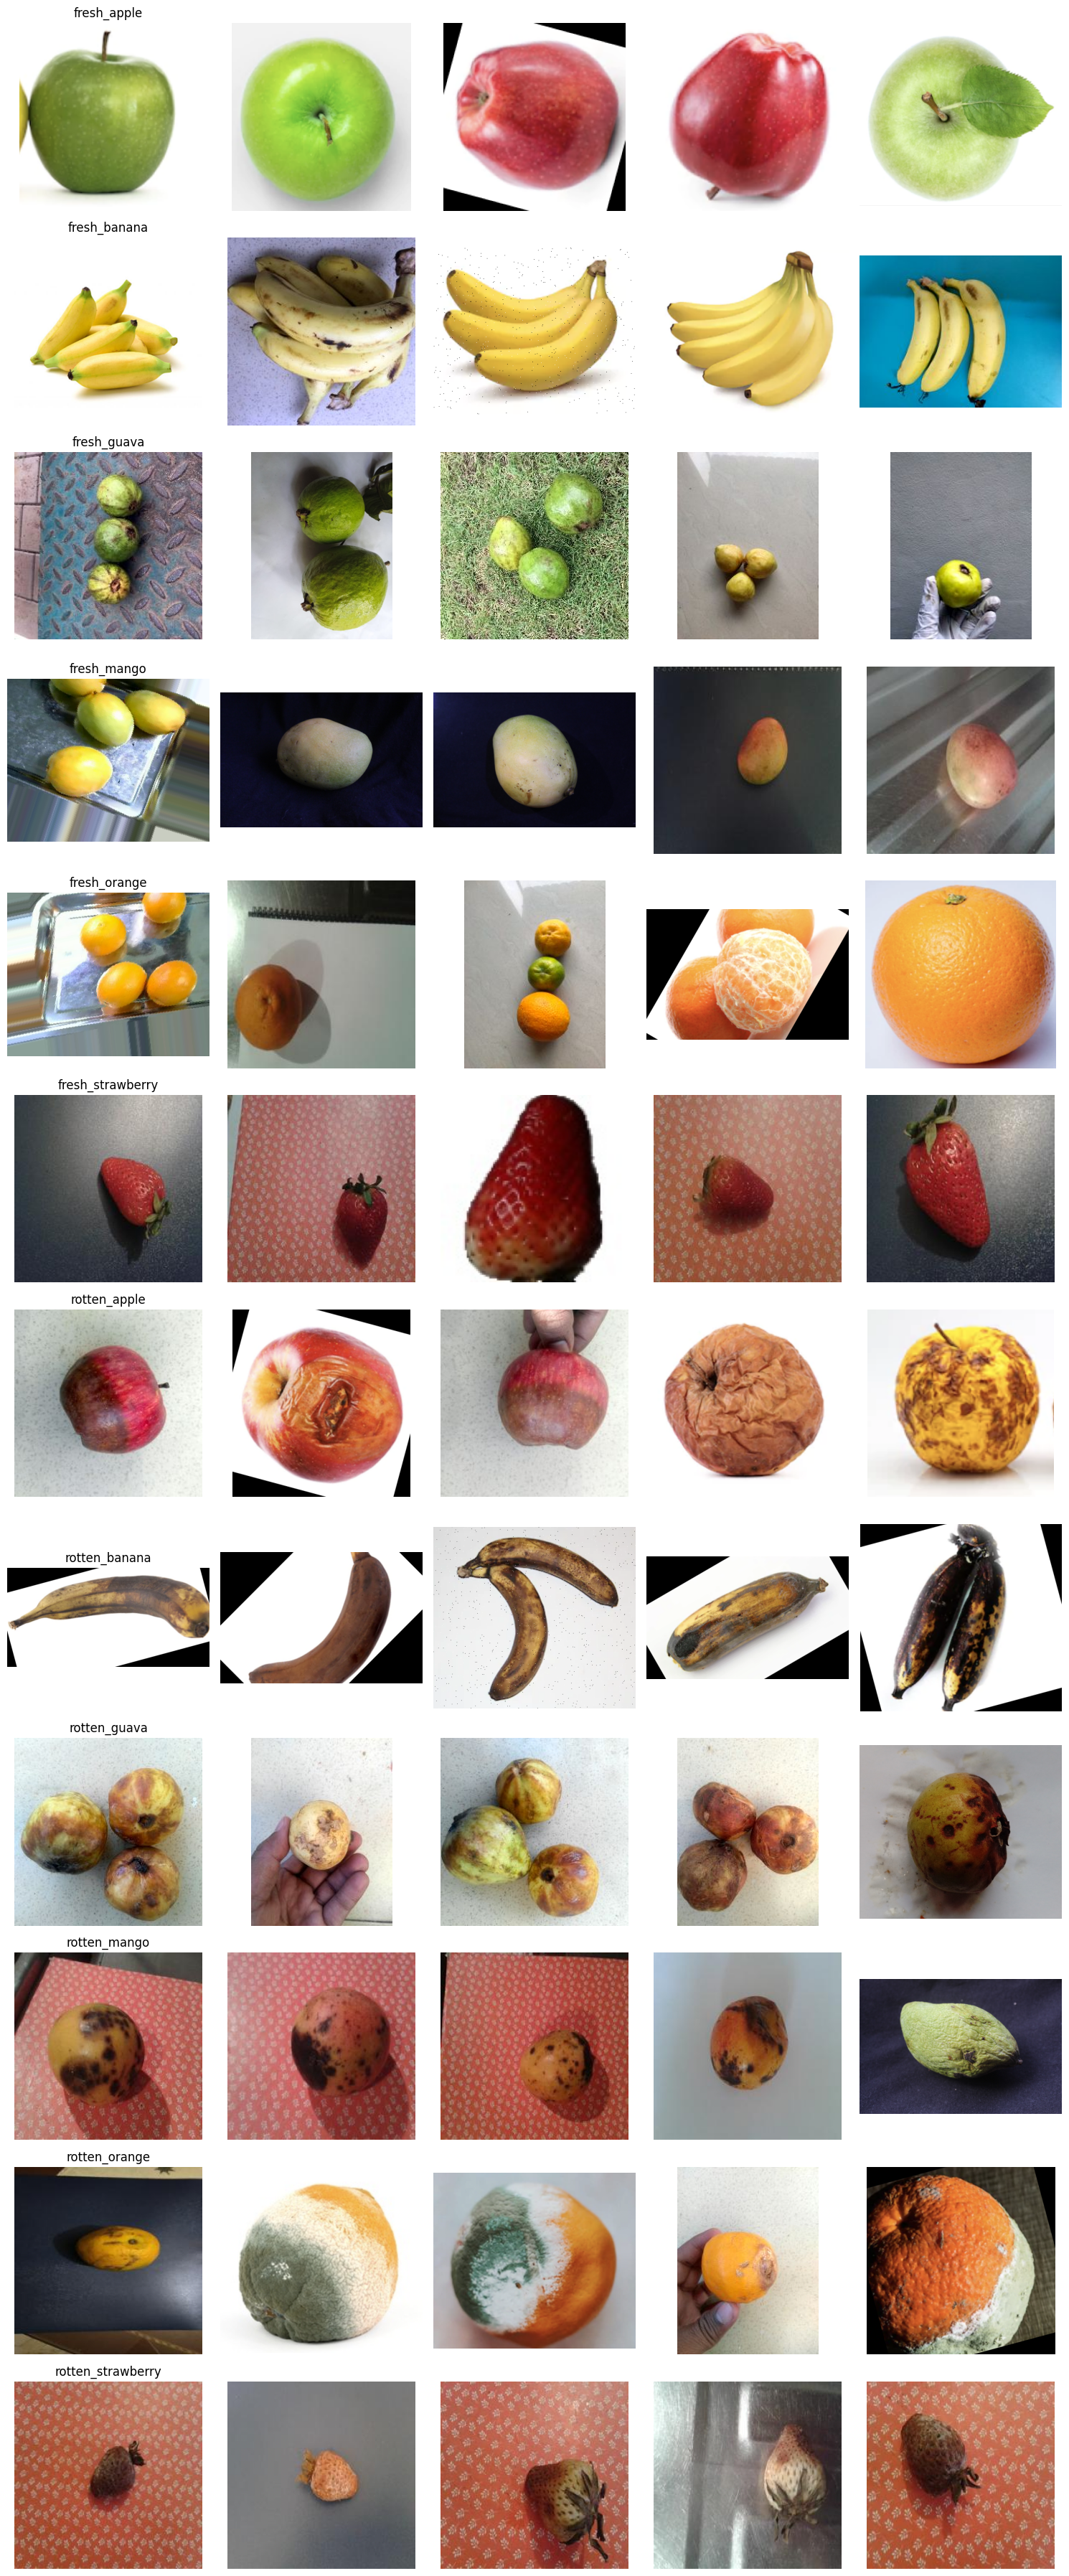

In [22]:
# show some random images from each class
num_images_per_class = 5

fig, axes = plt.subplots(len(classes), num_images_per_class, figsize=(15, 3 * len(classes)))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(TRAINING_DIR, class_name)
    class_images = os.listdir(class_dir)
    
    random_images = random.sample(class_images, num_images_per_class)

    for j, image_name in enumerate(random_images):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

for i, class_name in enumerate(classes):
    axes[i, 0].set_title(class_name)

plt.tight_layout()
plt.show()

# Data Augmentation

In [23]:
# Creates the training and validation data generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
  # Instantiate the ImageDataGenerator class for the training data
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,                               
                                     rotation_range=40)

  # Pass the training data generator to the flow_from_directory() method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class for the validation data
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass the validation data generator to the flow_from_directory() method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  
  # Instantiate the ImageDataGenerator class for the test data
  test_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass the test data generator to the flow_from_directory() method
  test_generator = test_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [24]:
# Call the train_val_generators() function
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR)

Found 17855 images belonging to 12 classes.
Found 2225 images belonging to 12 classes.
Found 2245 images belonging to 12 classes.


# Modelling

In [25]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
feature_extractor = hub.KerasLayer(module_url, input_shape = (224,224,3), trainable=False)

In [26]:
# Create the model architecture
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Flatten(),
         tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(12, activation='softmax')
])

In [27]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/5
558/558 [==============================] - 1112s 2s/step - loss: 0.4646 - accuracy: 0.8586 - val_loss: 0.1991 - val_accuracy: 0.9429
Epoch 2/5
558/558 [==============================] - 918s 2s/step - loss: 0.1975 - accuracy: 0.9386 - val_loss: 0.1492 - val_accuracy: 0.9551
Epoch 3/5
558/558 [==============================] - 904s 2s/step - loss: 0.1564 - accuracy: 0.9525 - val_loss: 0.1251 - val_accuracy: 0.9609
Epoch 4/5
558/558 [==============================] - 778s 1s/step - loss: 0.1384 - accuracy: 0.9554 - val_loss: 0.1204 - val_accuracy: 0.9618
Epoch 5/5
558/558 [==============================] - 699s 1s/step - loss: 0.1240 - accuracy: 0.9596 - val_loss: 0.0984 - val_accuracy: 0.9717


In [31]:
# Save the model with the current timestamp
current_datetime = datetime.now()

timestamp = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")  # Format the timestamp
model.save(f'model_Mobilenet_v2_{timestamp}')
model.save(f'model_Mobilenet_v2_{timestamp}.h5')

# Convert the model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the tflite model
with open(f'model_Mobilenet_v2_{timestamp}.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: model_Mobilenet_v2_2023-06-09_15-41-57\assets


INFO:tensorflow:Assets written to: model_Mobilenet_v2_2023-06-09_15-41-57\assets


INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmpbw7n1prg\assets


INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmpbw7n1prg\assets


In [33]:
# Create a function to test the model
def test_model(model, testing_generator):
    # Evaluate the model on the testing dataset
    scores = model.evaluate(testing_generator, verbose=1)

    # Print the evaluation results
    print("Test Loss:", scores[0])
    print("Test Accuracy:", scores[1])

# Define the custom objects
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the trained model with custom objects
model_test = tf.keras.models.load_model('model_Mobilenet_v2_2023-06-09_15-41-57.h5', custom_objects=custom_objects)

# Call the function to test the model
test_model(model_test, test_generator)


71/71 [==============================] - 107s 1s/step - loss: 0.0980 - accuracy: 0.9706
Test Loss: 0.09798698872327805
Test Accuracy: 0.9706013202667236


# Test Model

1/1 [==============================] - 1s 644ms/step
The model predicts the image is a rotten_apple
Confidence score: 0.7522115707397461


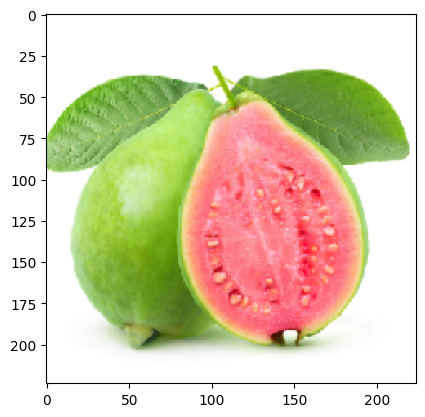

In [45]:
# Define the custom objects
custom_objects = {'KerasLayer': hub.KerasLayer}

# load the model.h5 file
model_test = tf.keras.models.load_model('model_Mobilenet_v2_2023-06-09_15-41-57.h5', custom_objects=custom_objects)

# Define valid fruit fresh/rotten classes
class_names = ['fresh_apple', 'fresh_banana', 'fresh_guava', 'fresh_mango', 'fresh_orange', 'fresh_strawberry', 'rotten_apple', 'rotten_banana', 'rotten_guava', 'rotten_mango', 'rotten_orange', 'rotten_strawberry']

# Load and preprocess the image
img = image.load_img('4_test_images/6.png', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# display the image
plt.imshow(img)

# Make predictions
prediction = model_test.predict(img_array)

# make a threshold for the prediction
threshold = 0.6

# Print the predictions based on the threshold
if prediction[0][prediction.argmax()] > threshold:
    print(f"The model predicts the image is a {class_names[prediction.argmax()]}")
    print(f"Confidence score: {prediction[0][prediction.argmax()]}")
else:
    print("Not a valid image")
